Import all Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Import the Dataset

In [91]:
data= pd.read_csv("Titanic.csv")

Shows top rows of the dataset

In [92]:
data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

Display the Data shape and information

In [93]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


To check the number of null values in our dataset

In [94]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we fill the value of "Age" and "Embarked" column with mode 

In [95]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data['Age'].fillna(data['Age'].mean(),inplace=True)


Now we will drop the value of "cabin" column

In [96]:
data=data.drop(columns='Cabin',axis=1)

Lets see the data now, as we have treated the null values

In [97]:
data.isnull().sum().sum()

0

We are doing survival prediction, so lets count the survivals

In [98]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Description of data

In [99]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets Perform Exploratory data analysis

In [100]:
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

<Axes: xlabel='Survived', ylabel='count'>

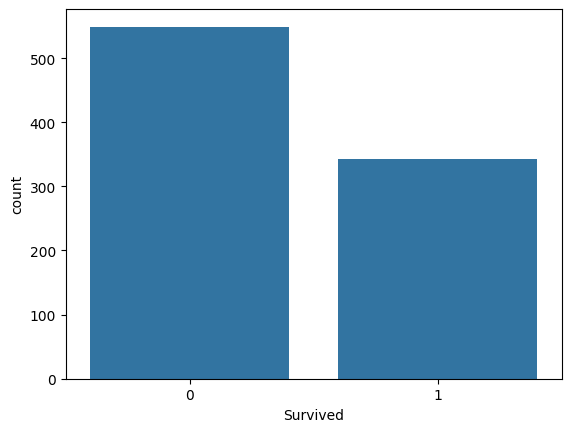

In [101]:
sns.countplot(x='Survived',data=data)




Print the number of siblings and parents 

In [102]:
print('Siblings:\n',data['SibSp'].value_counts())
print('Parents : \n',data['Parch'].value_counts())

Siblings:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parents : 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Number of Males and Females survived in Titanic Case

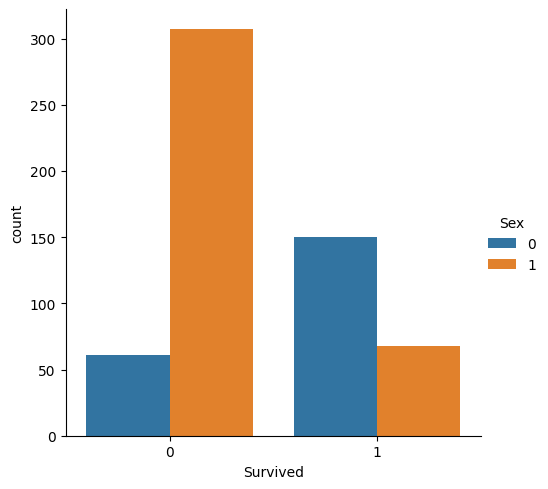

In [103]:
index_1=data[data['Age']>30].index
df=data.drop(index_1,axis=0)
sns.catplot(x='Survived',hue='Sex',kind='count',data=df)
plt.show()

Split the given data

In [106]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model training and evaluation 

In [109]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [111]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[91 14]
 [20 54]]


Predict the survival on a new data 

In [112]:
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['female'],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S']
})

In [114]:
for column in ['Sex', 'Embarked']:
    new_data[column] = label_encoders[column].transform(new_data[column])

Making prediction

In [115]:
prediction = model.predict(new_data)
print(f'Predicted survival: {prediction[0]}')

Predicted survival: 1
